<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RISCA

In [ ]:
%pwd
%cd ..
%cd ..
%rm -rf SAR_ADC

## Dependencies

In [1]:
!git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd SAR_ADC/script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe
from util.select import select

Cloning into 'SAR_ADC'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 500 (delta 292), reused 395 (delta 187), pack-reused 0 (from 0)
Receiving objects: 100% (500/500), 4.14 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (292/292), done.
/content/SAR_ADC/script


## Set Parameters

In [2]:
mdl = preset_mdl()
pr = preset_pr()
Mode='Single-Channel SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024

## Run Simulator

Loading file: ../config/sar/timing_table.xlsx
[util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 1
[util.load_assembler_xlsx] parameter f_in_center1 loaded: pr[f_in_center1]= 270000000


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,nan,nan,nan
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


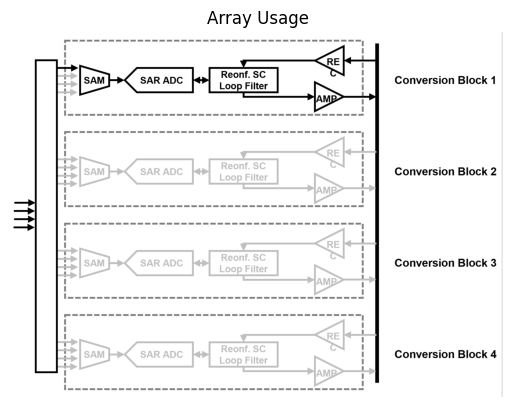

offset_nocal = -0.23 LSB


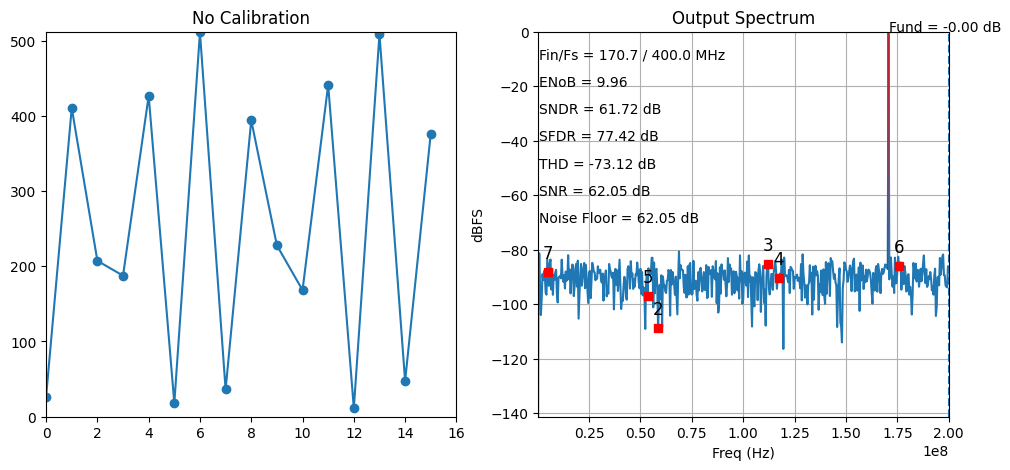

In [ ]:
# @title Run Simulator
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

# Convertion begins
da = RISCA_core(mdl, pr, signal_source(pr, mdl))

import matplotlib.pyplot as plt
from PIL import Image
img=Image.open("../pic/nssar1o1ccp.png")
plt.imshow(img)
plt.title('Array Usage')
plt.axis('off')
plt.show()

# Analyse the result
test = Analyser(da, pr, mdl)
test.mode_analyser()

## Single-Channel SAR

**Array Usage**

<figure>
  <img src="https://i.imgur.com/ZRyqsSs.png" width="600"/>
</figure>



Loading file: ../config/sar/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,nan,nan,nan
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


FileNotFoundError: [Errno 2] No such file or directory: '/content/SAR_ADC/script/..\\pic\\sar.png'

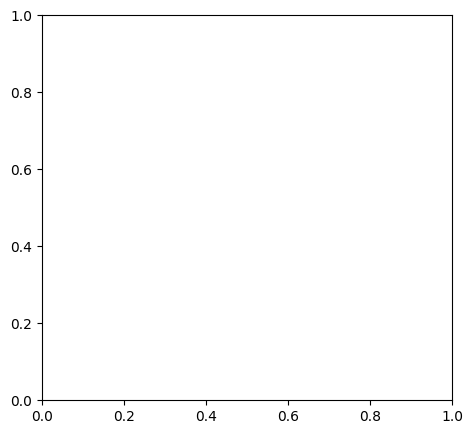

In [3]:
pr['conf_name']=select('Single-Channel SAR')
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()

## Multitasking_sarx2

**Array Usage**

<figure>
  <img src="https://i.imgur.com/4guQ7tR.png" width="600"/>
</figure>

## Sar4x

**Array Usage**

<figure>
  <img src="https://i.imgur.com/f21npca.png" width="600"/>
</figure>

## 3xTI-SAR

**Array Usage**

<figure>
  <img src="https://i.imgur.com/DnGDcA5.png" width="600"/>
</figure>

Loading file: ../config/tisar/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,LSB,OUT RST SAM1,MSB
CB3,MSB,LSB,OUT RST SAM1
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


FileNotFoundError: [Errno 2] No such file or directory: '/content/SAR_ADC/script/..\\pic\\tisar.png'

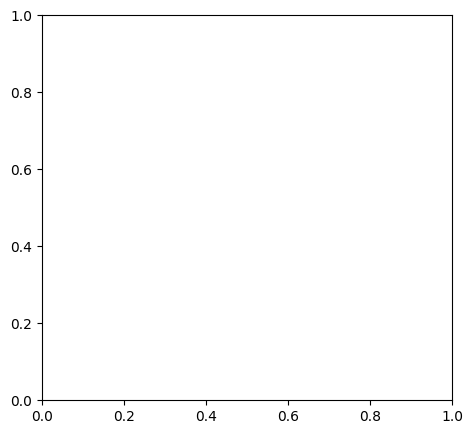

In [4]:
pr['conf_name']=select('3xTI-SAR')
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()

## 2-stage Pipe-Sar

**Array Usage**

<figure>
  <img src="https://i.imgur.com/bkj8NjW.png" width="600"/>
</figure>

In [7]:
pr['conf_name']=select('2-stage Pipe-Sar')
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()

Loading file: ../config/pipesar2s/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,AMP1
CB2,MSB,LSB,OUT RST SAM0 F1P0
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


ValueError: operands could not be broadcast together with shapes (1,1024,5) (1024,6) 

## 3-stage Pipe-Sar

**Array Usage**

<figure>
  <img src="https://i.imgur.com/LfVP8de.png" width="600"/>
</figure>

In [6]:
pr['conf_name']=select('3-stage Pipe-Sar')
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()

Loading file: ../config/pipesar3shp/timing_table.xlsx


,frame1,frame2,frame3,frame4,frame5
Item,,,,,
CB1,OUT RST SAM1,MSB,AMP1,AMP1,nan
CB2,AMP1,AMP1,OUT RST SAM0 F1P0,SAM0 F1P0,MSB
CB3,SAM0 F1P0,SAM0 F1P0,MSB,LSB,OUT RST
CB4,nan,nan,nan,nan,nan
CB5,nan,nan,nan,nan,nan
CB6,nan,nan,nan,nan,nan


TypeError: argument of type 'float' is not iterable

## 1st-order NS-SAR(with chopping)

**Array Usage**

<figure>
  <img src="https://i.imgur.com/lp6MLIP.png" width="600"/>
</figure>

Loading file: ../config/nssar1o1ccp/timing_table.xlsx


,Frame1,Frame2,Frame3,Frame4,Frame5,Frame6,Frame7,Frame8
Item,,,,,,,,
CB1,OUT RST RMAJ RMIN2 SAM1F,MSB CHS12,LSB,AMP0 F0N1,OUT RST RMAJ RMIN2 SAM1,MSB CHS12,LSB,AMP0 F0N1
CB2,nan,nan,nan,nan,nan,nan,nan,nan
CB3,nan,nan,nan,nan,nan,nan,nan,nan
CB4,nan,nan,nan,nan,nan,nan,nan,nan
CB5,nan,nan,nan,nan,nan,nan,nan,nan
CB6,nan,nan,nan,nan,nan,nan,nan,nan


/content/SAR_ADC/script/util/specPlot.py:244: RuntimeWarning: divide by zero encountered in log10
  (h,) = plt.semilogx(freq, 10 * np.log10(spec))


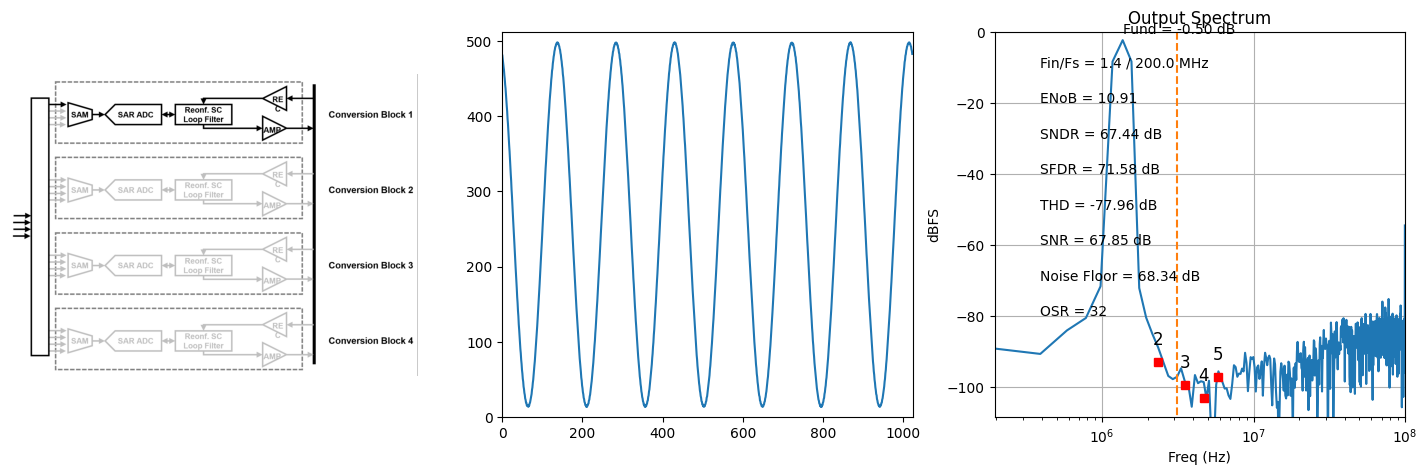

In [5]:
pr['conf_name']=select('1st-order NS-SAR(with chopping)')
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()